# Carga de tablas 

In [1]:
import pandas as pd

import numpy as np


datos = pd.read_excel('individuos_que_participan.xlsx')#se carga la base de datos

#Transformación de las variables categóricas

df = pd.DataFrame(data=datos) #Se crea un dataframe con los datos

# Códigos transformación de datos

In [2]:
from sklearn import preprocessing
from collections import defaultdict

df1 = df
d = defaultdict(preprocessing.LabelEncoder)


def SoloInt(X): #Método para saber si toda la columna es de int
    #for j in range (len(X)):
    if not(X.dtype == 'int64'):
            return False
    return True


labels = []
for c in datos:
    labels.append(c)#Contiene todas las características de la base de datos


for i in range (len(labels)):
    if not (SoloInt(df[labels[i]])):
        # Codificando la variable
        df1[labels[i]] = df1[labels[i]].astype(str)
        df1[labels[i]] = d[labels[i]].fit_transform(df[labels[i]])
        
        
datosCodificados = df1

for i in range (len(labels)):
    if (labels[i] in d):
        if isinstance(d[labels[i]].classes_[0], str):        
            index = np.where(d[labels[i]].classes_ == 'Nulo')[0]
            datosCodificados[labels[i]].replace(index, np.nan , inplace = True)
    else:
        datosCodificados[labels[i]].replace(-1, np.nan , inplace = True)
        

datosCodificados
# Inveritr codificado
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Usar el diccionario para la etiqueta de código futuro
#x = df.apply(lambda x: d[x.name].transform(x)

,S_1,S_2,I_6,I_8,I_9_1,I_9_2,I_10,I_11,I_12,I_12_1,...,I_62_2,I_62_3,I_62_4,I_62_5,I_62_6,I_62_7,I_62_8,I_62_9,I_62_10,I_62_11
0,12,4,2,5,3,3,5,9,1,1,...,1,0,3,1,1,0,0,0,1,3
1,12,4,0,5,3,3,0,8,0,0,...,1,1,0,4,0,2,2,0,0,0
2,12,4,2,0,3,3,3,5,1,0,...,1,1,1,1,1,2,0,0,0,1
3,12,4,0,5,3,3,0,2,1,1,...,1,1,0,0,1,2,3,0,0,0
4,12,4,2,5,3,3,0,5,0,0,...,4,0,2,1,0,0,0,1,0,0
5,12,4,2,5,0,6,4,5,1,1,...,4,4,0,0,4,4,3,4,0,4
6,12,4,0,3,3,3,1,9,1,1,...,4,4,4,4,4,4,4,4,4,4
7,12,4,0,5,7,2,5,7,1,1,...,0,0,0,0,0,0,0,0,0,0
8,12,4,0,5,3,3,0,2,0,0,...,0,0,1,1,0,1,0,0,0,0
9,12,4,0,2,3,3,3,8,0,0,...,4,3,4,3,4,4,1,4,4,4


# Empieza tratamiento de datos

## Datos Faltantes 

In [3]:
from sklearn.impute import SimpleImputer

#Llenar datos vacíos y pasar de DataFrame a Matriz
estrategia = SimpleImputer(strategy = 'most_frequent') #Se rellenan los datos faltantes por el método de el dato más frecuente
datosNuevos = estrategia.fit_transform(datosCodificados)

df_completo = pd.DataFrame(data=datosNuevos, columns=labels)#Creamos un nuevo df para el manejo de outliers

## Manejo de Outliers

In [4]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .01
    high = .99
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
    return df



df_sinOutLiers = remove_outlier(df_completo)
datosNuevos = df_sinOutLiers.values
df_sinOutLiers

,S_1,S_2,I_6,I_8,I_9_1,I_9_2,I_10,I_11,I_12,I_12_1,...,I_62_2,I_62_3,I_62_4,I_62_5,I_62_6,I_62_7,I_62_8,I_62_9,I_62_10,I_62_11
0,12.0,4.0,2.0,5.0,3.0,3.0,5.0,9.0,1.0,1.0,...,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
1,12.0,4.0,0.0,5.0,3.0,3.0,0.0,8.0,0.0,0.0,...,1.0,1.0,0.0,4.0,0.0,2.0,2.0,0.0,0.0,0.0
2,12.0,4.0,2.0,0.0,3.0,3.0,3.0,5.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0
3,12.0,4.0,0.0,5.0,3.0,3.0,0.0,2.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0
4,12.0,4.0,2.0,5.0,3.0,3.0,0.0,5.0,0.0,0.0,...,4.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,12.0,4.0,0.0,3.0,3.0,3.0,1.0,9.0,1.0,1.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
8,12.0,4.0,0.0,5.0,3.0,3.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,12.0,4.0,0.0,2.0,3.0,3.0,3.0,8.0,0.0,0.0,...,4.0,3.0,4.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
10,3.0,1.0,2.0,5.0,2.0,2.0,3.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
11,12.0,4.0,2.0,5.0,3.0,3.0,0.0,2.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Escalamiento de Datos

In [5]:
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot # Librería para hacer gráficas


MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

datosEscalados = MinMax_1.fit_transform(datosNuevos) # Transformación de los nuevos datos con una escala MinMax

fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(datosNuevos[:,1], datosNuevos[:,2], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(-5, 10) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(-1, 3) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Outilers') # Titulo de la gráfica
pyplot.xlabel('Zona') # Etiqueta del eje x
pyplot.ylabel('Género') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(datosEscalados[:,1], datosEscalados[:,2], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(-0.5, 1.5) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(-0.5,  1.5) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con MinMax') # Titulo de la gráfica
pyplot.xlabel('Zona') # Etiqueta del eje x
pyplot.ylabel('Género') # Etiqueta del eje y

pyplot.show()

<Figure size 1200x500 with 2 Axes>

# Normalización de Datos

In [6]:
xmax = np.amax(datosNuevos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
xmin = np.amin(datosNuevos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
N,D = datosNuevos.shape # Dimenisones de los datos

metodo_4 = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
for d in np.arange(D):
    for n in np.arange(N):
        metodo_4[n][d] = (datosNuevos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4

metodo_4

array([[0.12359551, 0.66666667, 1.        , ..., 0.        , 0.25      ,
        0.75      ],
       [0.12359551, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12359551, 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.13483146, 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07865169, 0.5       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.07865169, 0.5       , 1.        , ..., 1.        , 1.        ,
        0.        ]])

# Reducción de dimensionalidad


In [7]:
from sklearn.decomposition import PCA # Cargamos el método PCA

Componentes = PCA(iterated_power='auto', n_components = 100, random_state=None,
                  svd_solver='auto', tol=0.0, whiten=False) # Calcular los valores de las componentes principales


Variables_Principales = Componentes.fit_transform(datosEscalados) 
# Transformarmos las componentes principales a partir de los datos 

Varianza = Componentes.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las 
                                                 # componentes principales   
Varianza

array([0.16759882, 0.07094725, 0.04977776, 0.03604061, 0.02977443,
       0.02521078, 0.02195858, 0.0210373 , 0.01961242, 0.01734257,
       0.0160407 , 0.01541646, 0.01435042, 0.01317115, 0.01283204,
       0.01260013, 0.01190949, 0.0112054 , 0.01102215, 0.01031006,
       0.01008745, 0.0094125 , 0.0092775 , 0.00914455, 0.00887734,
       0.00864137, 0.00851074, 0.00816098, 0.00800002, 0.0078673 ,
       0.00750171, 0.00736941, 0.00702456, 0.00681951, 0.00672071,
       0.00646124, 0.00636872, 0.006133  , 0.00602974, 0.00599397,
       0.00589873, 0.00573623, 0.00557149, 0.00537198, 0.00527615,
       0.00515804, 0.00515438, 0.00507194, 0.00493462, 0.00482416,
       0.00465137, 0.00460688, 0.0045785 , 0.00448183, 0.00444186,
       0.00430774, 0.00415512, 0.00404744, 0.00402717, 0.00391681,
       0.00386713, 0.00381729, 0.00371055, 0.00367546, 0.00353831,
       0.00350803, 0.0034452 , 0.00341983, 0.00332714, 0.00326958,
       0.00315536, 0.0030838 , 0.00304619, 0.0030204 , 0.00297

[0.16759882 0.23854607 0.28832383 0.32436444 0.35413887 0.37934965
 0.40130824 0.42234553 0.44195795 0.45930052 0.47534122 0.49075768
 0.5051081  0.51827925 0.53111129 0.54371142 0.55562091 0.56682631
 0.57784847 0.58815853 0.59824598 0.60765848 0.61693598 0.62608053
 0.63495787 0.64359924 0.65210998 0.66027096 0.66827098 0.67613829
 0.68364    0.69100942 0.69803399 0.7048535  0.71157422 0.71803548
 0.72440421 0.73053722 0.73656699 0.74256099 0.74845974 0.75419599
 0.75976753 0.76513956 0.77041573 0.77557386 0.78072828 0.78580037
 0.79073509 0.79555929 0.80021096 0.80481794 0.80939656 0.81387852
 0.81832076 0.82262883 0.82678423 0.83083225 0.83485984 0.83877717
 0.84264497 0.84646348 0.85017493 0.85385098 0.85739146 0.86090077
 0.86434722 0.86776884 0.87109856 0.87437111 0.87752938 0.88061572
 0.88366827 0.88668988 0.88966134 0.89252168 0.89537442 0.8981753
 0.90092158 0.90363813 0.90633636 0.90902747 0.91154505 0.91404944
 0.91649352 0.91893316 0.92131948 0.9236895  0.92603324 0.92830

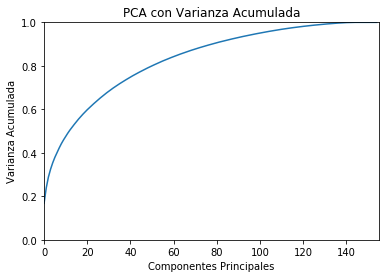

In [8]:
#Varianza acumulada
fil, col = datosEscalados.shape

ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(datosEscalados)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [9]:
Valores_Singulares = Componentes.singular_values_ # Se calcula los valores singulares por componente principal
Valores_Singulares

array([93.44610994, 60.79859496, 50.92644999, 43.33330624, 39.38650689,
       36.24256533, 33.82423049, 33.10706816, 31.96622339, 30.05955215,
       28.90928672, 28.34119181, 27.34374584, 26.19615429, 25.85673459,
       25.6220118 , 24.90991807, 24.16236885, 23.96398303, 23.17695825,
       22.92537627, 22.14512643, 21.98574602, 21.82764247, 21.50636871,
       21.2186174 , 21.05762475, 20.62039154, 20.41602653, 20.24597323,
       19.76996373, 19.59485909, 19.13089484, 18.84961123, 18.7125689 ,
       18.34778454, 18.21594736, 17.87566646, 17.7245454 , 17.67189848,
       17.53093041, 17.28776805, 17.03772472, 16.72988252, 16.57999512,
       16.39336278, 16.38755318, 16.25595977, 16.03440412, 15.85391504,
       15.56740404, 15.49276692, 15.44498758, 15.28106522, 15.21276312,
       14.98132895, 14.71355209, 14.52164966, 14.4852453 , 14.28537801,
       14.19450186, 14.10272523, 13.90415579, 13.83826375, 13.57762885,
       13.51940072, 13.39777696, 13.34835365, 13.16623388, 13.05

In [10]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.95, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datos = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape) # Tamaño de los datos originales
print(Nuevos_Datos.shape)

(3033, 155)
(3033, 101)


In [11]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datos)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(3033, 155)

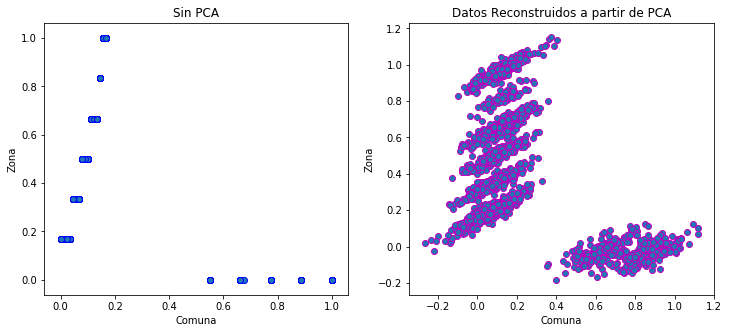

In [12]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('Comuna')
pyplot.ylabel('Zona')
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('Comuna')
pyplot.ylabel('Zona')
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

# Kernel PCA


In [13]:
from sklearn.decomposition import KernelPCA

In [26]:
Nuevas_Componentes_Kernel = KernelPCA(101, kernel = "rbf", fit_inverse_transform= True) 

Nuevos_Datos_Kernel = Nuevas_Componentes_Kernel.fit_transform(datosEscalados)

Nuevos_Datos_Kernel

array([[ 0.07849458, -0.09596012, -0.01320084, ...,  0.01163404,
        -0.00579757,  0.0299929 ],
       [ 0.00319527, -0.19360002,  0.05892485, ...,  0.00632268,
         0.00740928, -0.00763723],
       [ 0.05327991, -0.12251321, -0.00069427, ...,  0.04829334,
         0.00963955, -0.00204172],
       ...,
       [ 0.27508173,  0.07858017, -0.07494606, ...,  0.02093127,
        -0.00758039, -0.03554585],
       [ 0.11390838, -0.03638649,  0.03940792, ...,  0.00573987,
        -0.03891894, -0.02824422],
       [ 0.09207672,  0.13165879, -0.04999038, ...,  0.01610681,
         0.02546476, -0.00535262]])

In [27]:
X_Reconstruido_Kernel = Nuevas_Componentes_Kernel.inverse_transform(Nuevos_Datos_Kernel)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido_Kernel.shape

(3033, 155)

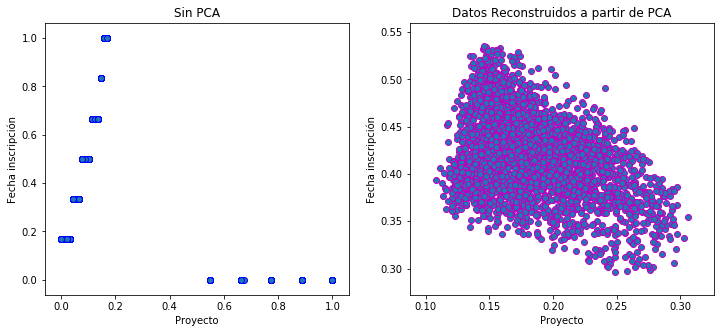

In [28]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('Proyecto')
pyplot.ylabel('Fecha inscripción')
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido_Kernel[:,0], X_Reconstruido_Kernel[:,1], edgecolors="m")
pyplot.xlabel('Proyecto')
pyplot.ylabel('Fecha inscripción')
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

# Clustering

# K-means

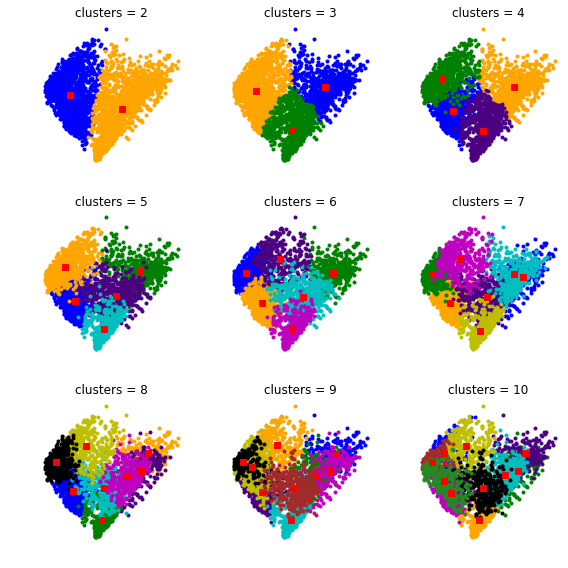

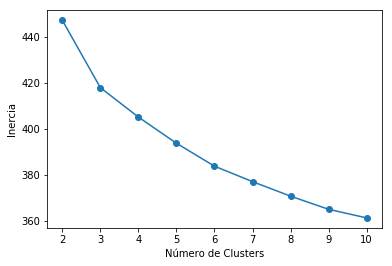

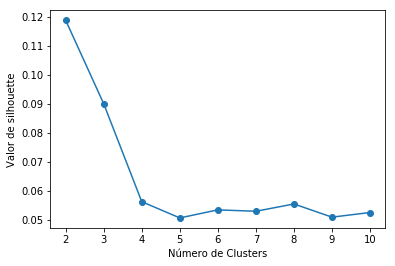

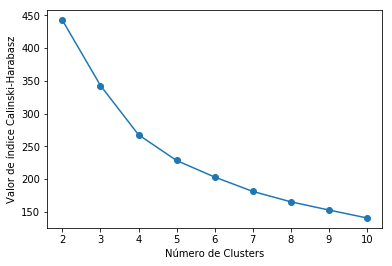

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos_Kernel[:,0]
ypts =  Nuevos_Datos_Kernel[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # Se construye el modelo Kmeans
    # n_clusters es el número de clusters
    # init es la condición inicial de los centros. 'random' signfica que se genera aleatoriamente los centros.
    # Se puede usar en int la opción ‘k-means++’, el cual selecciona los centros iniciales del cluster para
    # que el algoritmo de una manera inteligente converga rápidamente. Se aconseja usar esta opción para datos de alta
    # dimensionalidad.
    # n_init es el número de veces que el algoritmo actualiza los centros. Por defecto es 10 pero puedes cambiar el valor.
    # tol es el error que se desea superar.
    # max_iter es el número de iteraciones.
    # precompute_distances es una opción para pre-calcular las distancias. Si seleccionas 'True', entonces siempre se pre-calcula
    # las distancias. Si es 'False', entonces nunca se pre-calcula las distancias. Si es 'auto', entonces se selecciona
    # 'True' o 'False' de acuerdo al número de muestras y el número de clases. Se recomienda esta última opción.
    # algorithm es el algoritmo K-means a utilizar. Si es "full", se aplica el estilo clásico del algoritmo. Si es "elkan",
    # se aplica una variación del algoritmo k-means para mayor eficiencia pero se recomienda para datos que no esten tan
    # esparcidos. Si es "auto", entonces selecciona "elkan" si los datos son densos o "full" si los datos son esparcidos.
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos_Kernel) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datos_Kernel, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabasz_score(Nuevos_Datos_Kernel, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])

    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()